In [1]:
import geopandas as gpd

In [2]:
roads = gpd.read_file('SH_Road.shp')
roads.head()

,ID,DISTNAME,ROADNUMBER,CLASSIFICA,DRAWLEVEL,OVERRIDE,FEATCODE,geometry
0,ED8E3F1E-3ADA-40A6-8D96-B9CE5246135F,NaN,NaN,Local Road,0,F,15760,"LINESTRING Z (248668.970 387486.850 0.000, 248..."
1,77845DFB-ECFF-4DD4-A484-506845DF2435,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248833.550 387822.120 0.000, 248..."
2,5E0208DE-B110-4963-BAA2-1DDB71FAF6BD,NaN,NaN,Local Road,0,F,15760,"LINESTRING Z (248833.550 387822.120 0.000, 248..."
3,08461678-B973-45ED-93CA-B3BABD98BC75,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248753.190 387361.020 0.000, 248..."
4,2BE50484-C47E-46A4-8FDB-BE3BA4CBE107,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (248813.120 387329.190 0.000, 248..."


In [3]:
selected_ids = ['131324F8-FBCD-4389-B15E-B4EF4021D593',
                '1D5F1288-107D-485D-8CF2-C1117D328C9B',
                'FE5D98A4-BCB2-4016-84CD-045B94858A3F']
selected_ids = ['0807C27F-5B78-4265-8E5B-32DE499D846A']
selected_roads = roads[roads['ID'].isin(selected_ids)]
selected_roads

,ID,DISTNAME,ROADNUMBER,CLASSIFICA,DRAWLEVEL,OVERRIDE,FEATCODE,geometry
39196,0807C27F-5B78-4265-8E5B-32DE499D846A,NaN,NaN,Restricted Local Access Road,0,F,15762,"LINESTRING Z (256493.830 325710.310 0.000, 256..."


<Axes: >

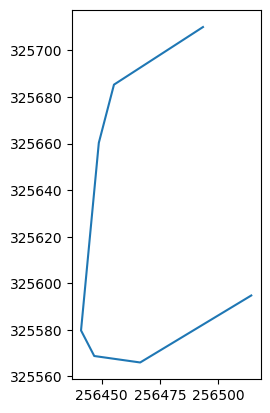

In [4]:
selected_roads.plot()

In [5]:
search_margin = 20

In [6]:
selected_roads.bounds

,minx,miny,maxx,maxy
39196,256441.08,325566.0,256514.58,325710.31


In [7]:
all_bounds = (min(selected_roads.bounds['minx'])-search_margin,
              min(selected_roads.bounds['miny'])-search_margin,
              max(selected_roads.bounds['maxx'])+search_margin,
              max(selected_roads.bounds['maxy'])+search_margin)
all_bounds

(256421.08000000002, 325546.0, 256534.58000000002, 325730.31)

In [8]:
max_extent = max((all_bounds[2]-all_bounds[0],
                  all_bounds[3]-all_bounds[1]))
centre = (0.5*(all_bounds[2]+all_bounds[0]),
          0.5*(all_bounds[3]+all_bounds[1]))
print(centre,max_extent)

(256477.83000000002, 325638.155) 184.30999999999767


In [9]:
from scipy.stats.qmc import PoissonDisk

In [10]:
import numpy as np

In [57]:
radius = 5.0
num_samples = (max_extent/radius)**2
sampler = PoissonDisk(d=2, radius=radius/max_extent)
scaled_samples = max_extent*(sampler.random(num_samples)-0.5)
num_samples = np.size(scaled_samples,0)
samples = scaled_samples + np.tile(np.array(centre),(num_samples,1))
print(samples,num_samples)

[[256498.7520463  325629.4905793 ]
 [256495.35649792 325635.47851434]
 [256499.89426147 325638.1401389 ]
 ...
 [256547.55347937 325710.39161209]
 [256385.68979186 325594.6387272 ]
 [256385.85118474 325601.43257403]] 834


In [58]:
from shapely import Point, LineString

In [59]:
sample_points = [Point(samples[ii,0],samples[ii,1]) for ii in range(num_samples)]

In [60]:
sample_points = gpd.GeoSeries(sample_points,crs=roads.crs)

<Axes: >

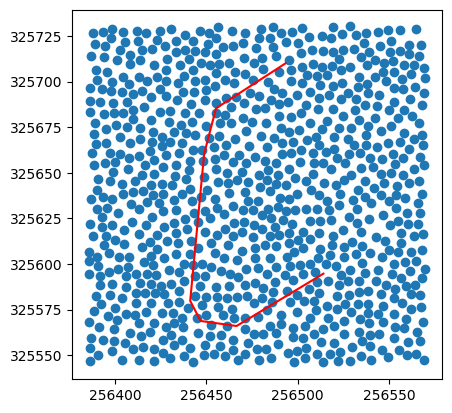

In [61]:
ax = sample_points.plot()
selected_roads.plot(ax=ax,color='red')

In [62]:
sample_distances = [min(selected_roads.distance(p)) for p in sample_points]
sample_distances

[37.93987964080407,
 44.80227320950119,
 45.561823904648705,
 36.48918043495345,
 36.520406941206055,
 29.769085206827402,
 32.05565094289428,
 39.85489274640337,
 42.80195008459403,
 37.760007851843085,
 39.84571838307999,
 37.76326905987867,
 46.18456853305536,
 50.64770429784037,
 46.020782553071605,
 51.480021090336784,
 41.340078386874204,
 41.02194229180444,
 47.22213224814091,
 35.60409315887724,
 22.038343156210935,
 28.458402656798302,
 25.16598551142157,
 20.462525845660917,
 29.386978304928345,
 39.7276708163824,
 34.7402349388373,
 29.510461043901085,
 31.965180479480985,
 43.731251743335754,
 17.939960889472506,
 28.93863401742158,
 24.314303672759845,
 49.84864872804569,
 40.730606543551545,
 42.86790361953521,
 39.349490218121026,
 48.572452042655044,
 42.97589123075669,
 44.382093853090694,
 37.944574182106045,
 49.379770498152666,
 30.502040950575495,
 35.57178466656087,
 35.42375598892722,
 17.910549872411817,
 18.568991543249986,
 32.43887095131479,
 35.8702995431380

<Axes: >

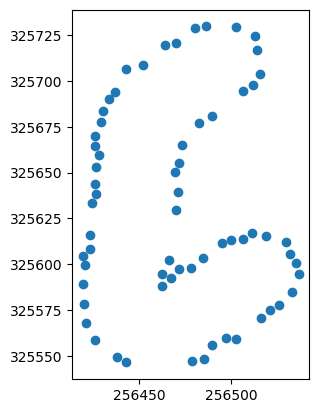

In [63]:
flags = [d < search_margin+0.95*radius and d > search_margin for d in sample_distances]
edge_points = sample_points[flags]
edge_points.plot()

<Axes: >

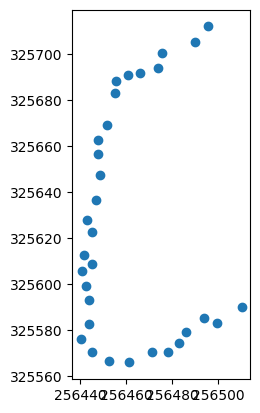

In [64]:
flags = [d < 0.6*radius for d in sample_distances]
road_points = sample_points[flags]
road_points.plot()

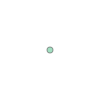

In [65]:
top_arg = np.argmax(edge_points.y)
top_point = edge_points.iloc[top_arg]
top_point

In [66]:
from shapely.ops import nearest_points

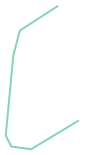

In [67]:
selected_roads.unary_union

In [68]:
top_nearest = gpd.GeoSeries(nearest_points(top_point, selected_roads.unary_union))

<Axes: >

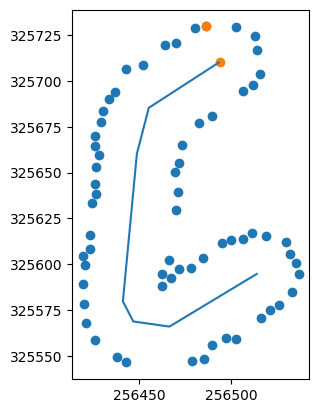

In [69]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)

In [70]:
opposite_point = Point(top_point.x + 2*(top_nearest[1].x - top_point.x),
                       top_point.y + 2*(top_nearest[1].y - top_point.y))

<Axes: >

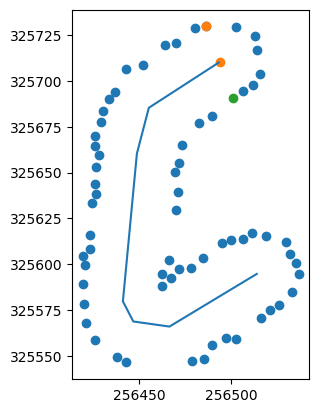

In [71]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)
gpd.GeoSeries([opposite_point]).plot(ax=ax)

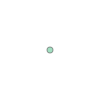

In [72]:
start_point = top_point
start_point

In [73]:
def opposing_point(first_point, overshoot=1.0):
    nearest_road = nearest_points(first_point, selected_roads.unary_union)[1]
    opposite_point = Point(first_point.x + (1.0+overshoot)*(nearest_road.x - first_point.x),
                           first_point.y + (1.0+overshoot)*(nearest_road.y - first_point.y))
    return opposite_point

opposing_point(start_point).xy

(array('d', [256501.38510629456]), array('d', [325690.93670437986]))

In [74]:
gdf_edge_points = gpd.GeoDataFrame(geometry=edge_points)
gdf_edge_points['visited'] = False

In [75]:
def closest_unvisited_edge_point_name(target_point):
    unvisited_points = gdf_edge_points[gdf_edge_points['visited']==False]
    ix_closest = np.argmin(unvisited_points.distance(target_point))
    closest_point_name = unvisited_points.iloc[ix_closest].name
    return closest_point_name
closest_point_name = closest_unvisited_edge_point_name(opposite_point)

<Axes: >

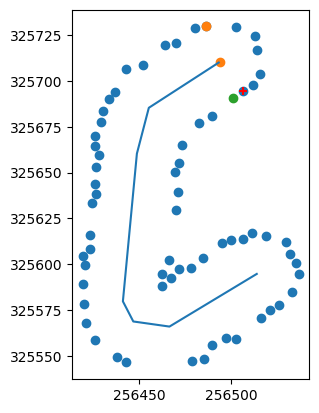

In [76]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
top_nearest.plot(ax=ax)
gpd.GeoSeries([opposite_point]).plot(ax=ax)
gdf_edge_points[gdf_edge_points.index==closest_point_name].plot(ax=ax,color='r',marker='+')

In [77]:
start_point = gdf_edge_points.iloc[top_arg]
gdf_edge_points.loc[start_point.name,'visited'] = True

In [78]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
tour = [start_point.geometry]
for ii in range(len(gdf_edge_points)):
    opposite_point = opposing_point(current_point.geometry)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256486.275 325729.683)>,
 <POINT (256506.477 325694.389)>,
 <POINT (256511.963 325698.014)>,
 <POINT (256470.096 325720.924)>,
 <POINT (256464.268 325719.558)>,
 <POINT (256489.516 325681.084)>,
 <POINT (256482.652 325677.222)>,
 <POINT (256452.018 325708.855)>,
 <POINT (256442.765 325706.379)>,
 <POINT (256473.504 325664.843)>,
 <POINT (256471.704 325655.319)>,
 <POINT (256427.807 325659.717)>,
 <POINT (256425.734 325664.649)>,
 <POINT (256469.456 325650.502)>,
 <POINT (256471.05 325639.664)>,
 <POINT (256425.738 325643.731)>,
 <POINT (256426.16 325638.296)>,
 <POINT (256470.141 325629.548)>,
 <POINT (256466.485 325602.211)>,
 <POINT (256419.388 325604.385)>,
 <POINT (256420.654 325599.389)>,
 <POINT (256462.661 325594.479)>,
 <POINT (256467.418 325592.673)>,
 <POINT (256489.471 325556.13)>,
 <POINT (256497.193 325559.95)>,
 <POINT (256478.274 325597.884)>,
 <POINT (256471.498 325597.42)>,
 <POINT (256502.749 325559.262)>,
 <POINT (256516.39 325570.559)>,
 <POINT (256495.135 

In [79]:
current_point = start_point
gdf_edge_points['visited'] = False
gdf_edge_points.loc[start_point.name,'visited'] = True
start_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
tour = [Point(start_road.x,start_road.y),start_point.geometry]
for ii in range(len(gdf_edge_points)):
    nearest_road = nearest_points(current_point.geometry, selected_roads.unary_union)[1]
    tour.append(Point(nearest_road.x,nearest_road.y))
    opposite_point = opposing_point(current_point.geometry,overshoot=0.75)
    closest_point_name = closest_unvisited_edge_point_name(opposite_point)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    closest_point_name = closest_unvisited_edge_point_name(current_point.geometry)
    tour.append(gdf_edge_points.loc[closest_point_name,'geometry'])
    gdf_edge_points.loc[closest_point_name,'visited'] = True
    current_point = gdf_edge_points.loc[closest_point_name]
    if np.all(gdf_edge_points['visited']):
        break
    
tour

[<POINT (256493.83 325710.31)>,
 <POINT (256486.275 325729.683)>,
 <POINT (256493.83 325710.31)>,
 <POINT (256506.477 325694.389)>,
 <POINT (256511.963 325698.014)>,
 <POINT (256493.83 325710.31)>,
 <POINT (256480.145 325728.652)>,
 <POINT (256470.096 325720.924)>,
 <POINT (256481.943 325702.613)>,
 <POINT (256489.516 325681.084)>,
 <POINT (256482.652 325677.222)>,
 <POINT (256470.862 325695.444)>,
 <POINT (256452.018 325708.855)>,
 <POINT (256442.765 325706.379)>,
 <POINT (256456.043 325685.856)>,
 <POINT (256473.504 325664.843)>,
 <POINT (256471.704 325655.319)>,
 <POINT (256448.453 325657.524)>,
 <POINT (256427.807 325659.717)>,
 <POINT (256425.734 325664.649)>,
 <POINT (256448.72 325660.34)>,
 <POINT (256469.456 325650.502)>,
 <POINT (256471.05 325639.664)>,
 <POINT (256446.976 325641.947)>,
 <POINT (256425.738 325643.731)>,
 <POINT (256426.16 325638.296)>,
 <POINT (256446.448 325636.373)>,
 <POINT (256470.141 325629.548)>,
 <POINT (256466.485 325602.211)>,
 <POINT (256443.416 3256

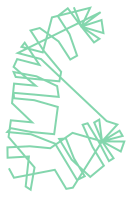

In [80]:
tour_line = LineString(tour)
tour_line

In [95]:
tour_line.length

2075.0781950522196

<Axes: >

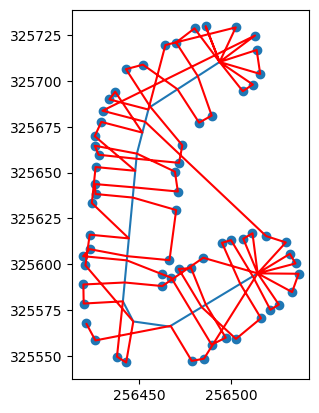

In [81]:
ax = edge_points.plot()
selected_roads.plot(ax=ax)
gdf_tour = gpd.GeoDataFrame(geometry=[tour_line])
gdf_tour.plot(ax=ax,color='red')

In [82]:
gdf_tour.crs = 'EPSG:27700'
gdf_tour_gps = gdf_tour.to_crs('EPSG:4326')

In [83]:
gdf_tour.to_file('tour.shp')

In [84]:
gdf_tour_gps.to_file('tour_gps.shp')

In [85]:
from pymavlink.mavwp import MAVWPLoader
from pymavlink.dialects.v20.common import MAVLink_mission_item_int_message, MAV_CMD_NAV_TAKEOFF, MAV_CMD_NAV_LAND

In [86]:
gdf_tour_gps['geometry'][0].coords[0]

(-4.130526183201807, 52.80978933428733)

In [91]:
alt = 20
alt_frame = 3
wp = MAVWPLoader()
takeoff_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_TAKEOFF, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            0, # int(wp.x*1.0e7),
            0, # int(wp.y*1.0e7),
            alt) # wp.z
wp.add(takeoff_cmd)
wp.add(takeoff_cmd)

In [92]:
for pt in gdf_tour_gps['geometry'][0].coords:
    wp.add_latlonalt(pt[1],pt[0],20.0)

In [93]:
land_cmd = MAVLink_mission_item_int_message(
            1, # wp.target_system,
            1, # wp.target_component,
            0, # wp.seq,
            alt_frame, # wp.frame,
            MAV_CMD_NAV_LAND, # wp.command,
            0, # wp.current,
            1, # wp.autocontinue,
            0, # wp.param1,
            0, # wp.param2,
            0, # wp.param3,
            0, # wp.param4,
            gdf_tour_gps['geometry'][0].coords[0][1], # int(wp.x*1.0e7), lat
            gdf_tour_gps['geometry'][0].coords[0][0], # int(wp.y*1.0e7), lon
            0) # wp.z
wp.add(land_cmd)

In [94]:
    
file_name = 'mission.txt'
wp.save(file_name)